In [1]:
import plotly.express as px
import plotly.figure_factory as ff

import numpy as np
import geopandas as gpd
import pandas as pd

# Primera Visualización - Cartograma

En la primera visualización, se usa la librería Plotly para generear un mapa modificado ligeramente.

Los datos que representa corresponden al Producto Interior Bruto (PIB) nominal de las diferentes Comunidades Autónomas (CCAA), excepto Canarias, para el año 2022.

El mapa representa de forma distorsionada la relevancia del PIB de cada CCAA. Además, se ha añadido un código de colores en azul que premite visualizar fácilmente qué PIB tiene cada CCAA según la intensidad (a mayor PIB más oscuro es el color azul), que además se aclara en la leyenda.

El mapa se ha obtenido de la web [go-kart](https://go-cart.io/), en donde tras introducir los datos del PIB publicados en el [INE](https://ine.es) se han indicado los valores correspondientes a cada región del mapa disponible en la web, y se ha generado una visualización con la librería Plotly que se ha exportado en formato GeoJSON.

Para obtener más información de cada región, se puede poner el cursor encima de los datos para obtener mnás información detallada, como la posición de dicha CCAA respecto del total, así como el valor  exacto del PIB.

In [2]:
# Primera Visualización

## Lectura de datos desde fichero GeoJSON
gdf_gdp = gpd.read_file("G:/Mi unidad/Aa-UOC/2_2C/VDatos/PEC2/spain_gdp_template.geojson")

## Renombrado de ampos y ordenación de valores 
gdf_gdp = gdf_gdp.rename(columns=dict(name="Comunidad Autónoma",
                                      value="PIB (en Euros)"))

gdf_gdp = gdf_gdp.sort_values(by=["PIB (en Euros)", "Comunidad Autónoma"], ascending=False)

gdf_gdp.index = np.arange(1, len(gdf_gdp) + 1)

gdf_gdp[["Comunidad Autónoma", "PIB (en Euros)"]].style

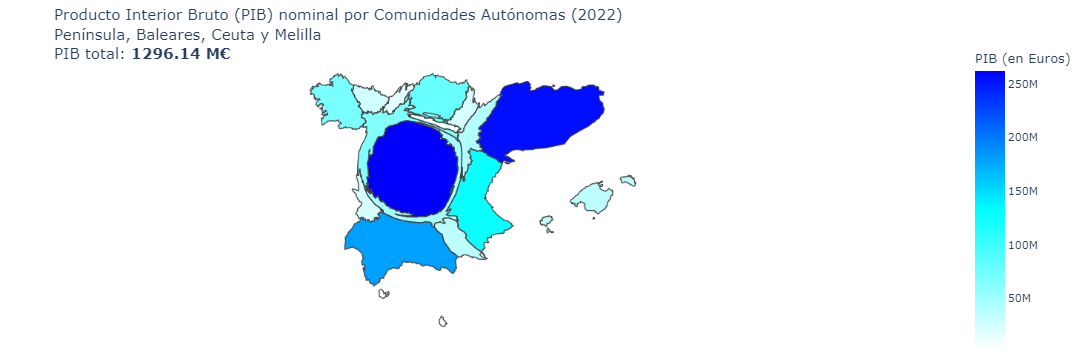

In [3]:
## Cartograma del PIB por CCAA

gdp_suma = sum(gdf_gdp["PIB (en Euros)"])/1000000

px.choropleth_mapbox(
    gdf_gdp,
    geojson=gdf_gdp["geometry"].__geo_interface__,
    locations=gdf_gdp.index,
    color="PIB (en Euros)",
    hover_name="Comunidad Autónoma",
    color_continuous_scale=[(0, "white"), (0.5, "cyan"), (1, "blue")]
).update_layout(
    title="Producto Interior Bruto (PIB) nominal por Comunidades Autónomas (2022) <br>" +
          "Península, Baleares, Ceuta y Melilla <br>" +
          "PIB total: <b>" + str(round(gdp_suma, 2)) + " M€",
    mapbox={
        "style": "white-bg",
        # "center": dict(lat = 40.41, lon = -3.70),
        "zoom":7,
    },
    margin={"l":0,"r":0,"t":40,"b":0},
    font=dict(size=11)
)

# Segunda Visualización - Dendrograma Lineal

En la segunda visualización se muestra una agrupación de los países de la Unión Europea (UE) en relación al porcentaje de desempleo durante el año 2023.

Los datos se han obtenido del [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/UNE_RT_M__custom_10981417/default/table?lang=en), en donde se desglosa el porcentaje de desempleo de cada estado de la UE (se incluye un campo que representa la media de la UE, EU27_2020) para cada mes durante el año 2023. La gráfica se ha generado usando la librería Plotly de Python.

El dendrograma muestra agrupaciones de países con porcentajes similares. Como se puede ver a continuación, países como España o Grecia son unidos debido a que ambos países poseen cerca de un 11% de desempleo, a la vez que países como Italia, Francia, Suecia o Finlandia también son agrupados en el mismo subgrupo puesto que comparten valores de desempleo alrededor de un 7.5%.

In [4]:
# Segunda Visualización

## Lectura de los datos en CSV y edición de los nombres de los estados
file = "G:/Mi unidad/Aa-UOC/2_2C/VDatos/PEC2/eurostat_eu_unemployment_2023_months.csv"
df = pd.read_csv(file)

country_names = ["Austria", "Belgium", "Bulgaria", "Cyprus", "Czechia", "Germany", "Denmark", "Estonia",
                 "Greece", "Spain", "EU27-2023 Average", "Finland", "France", "Croatia", "Hungary",
                 "Ireland", "Italy", "Lithuania", "Luxembourg", "Latvia", "Malta", "Netherlands",
                 "Poland", "Portugal", "Romania", "Sweden", "Slovenia", "Slovakia"]

df["country"] = country_names
df.rename(columns=dict(country="País UE")).style.format(precision=1)

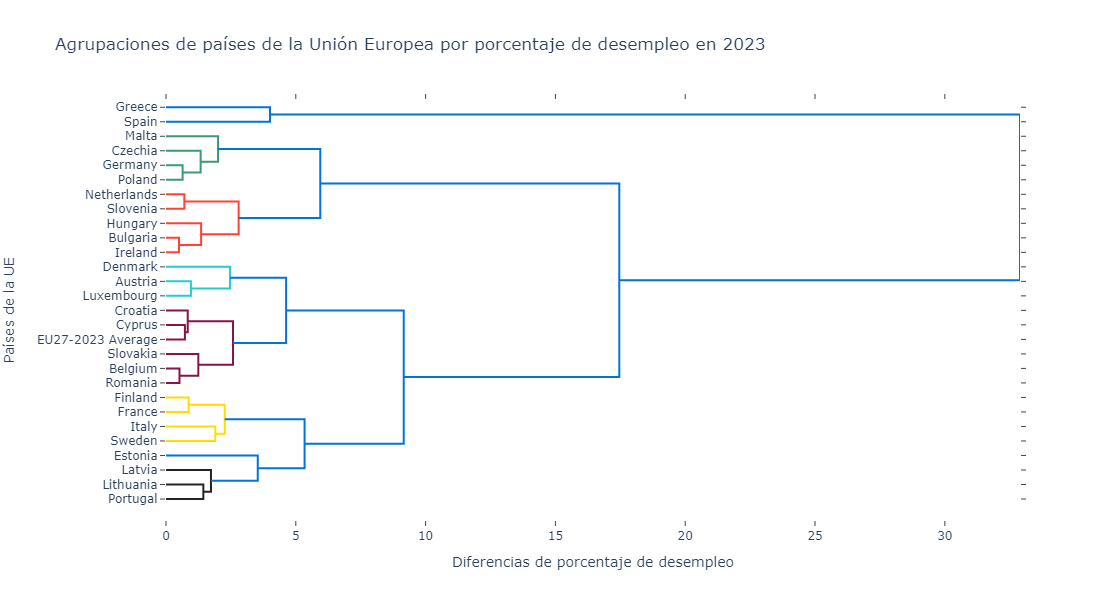

In [5]:
## Dendrograma que agrupa los estados de la UE por la tasa de desempleo media durante 2023

X = df.loc[:, df.columns != "country"]

fig = ff.create_dendrogram(X, labels=country_names, color_threshold=3.0, orientation='left')
fig.update_layout(width=750, height=600,
                  title="Agrupaciones de países de la Unión Europea por porcentaje de desempleo en 2023",
                  xaxis_title="Diferencias de porcentaje de desempleo",
                  yaxis_title="Países de la UE",
                  plot_bgcolor="rgba(0, 0, 0, 0)")
fig.show()